In [8]:
!pip install tpot

In [29]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split , cross_val_score , cross_val_predict
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score

In [10]:

a = load_breast_cancer()
# Convert the NumPy array to a Pandas DataFrame
df = pd.DataFrame(a.data, columns=a.feature_names)
df['target'] = a.target
pd.set_option('display.max_columns', None)


df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


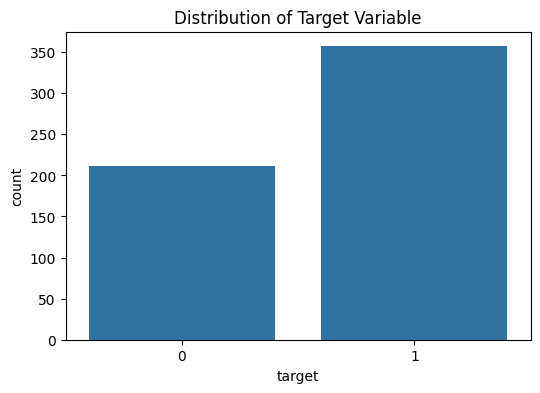

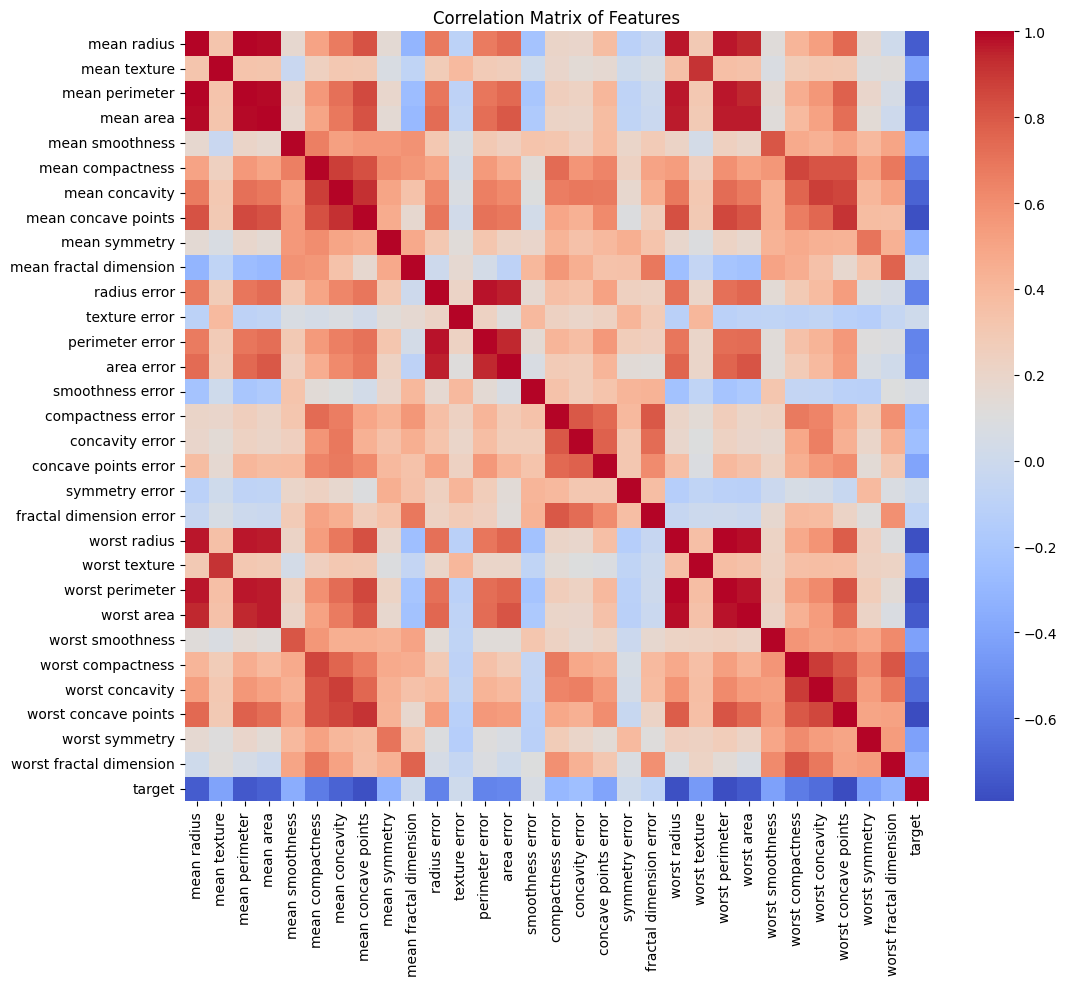

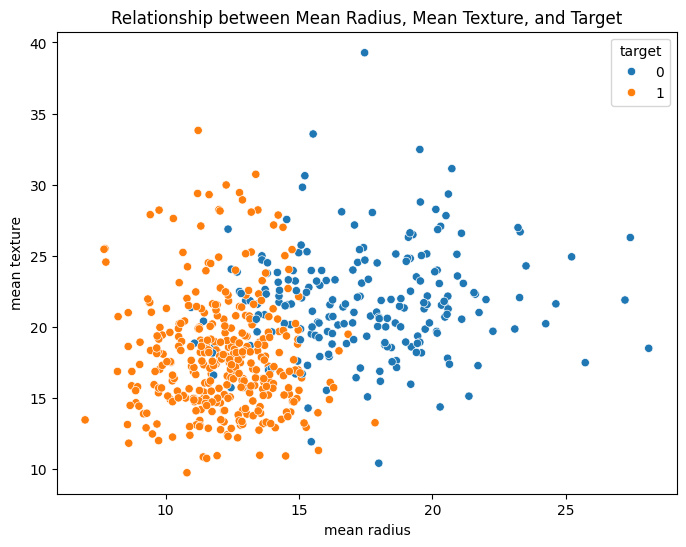

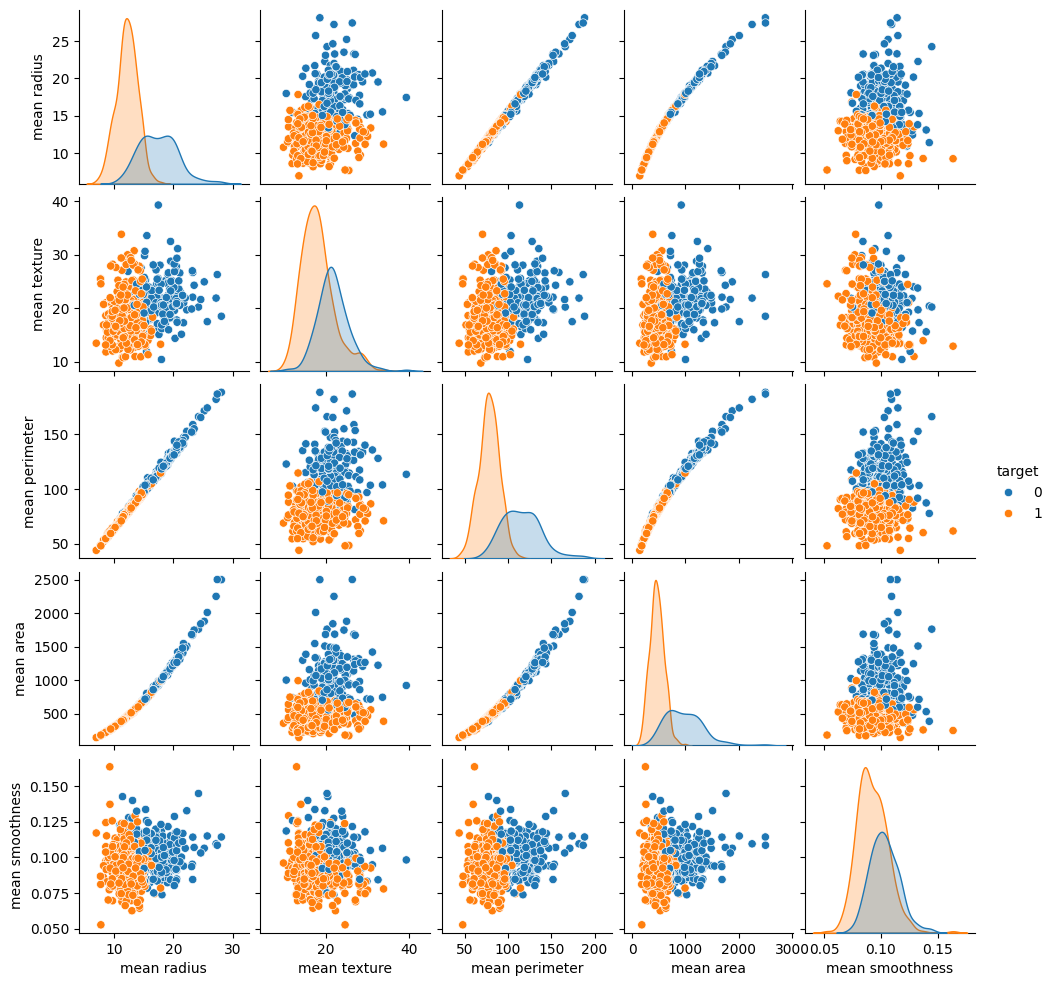

In [30]:


# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix of features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Visualize the relationship between two features and the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean radius', y='mean texture', hue='target', data=df)
plt.title('Relationship between Mean Radius, Mean Texture, and Target')
plt.show()

# Pairplot for multiple features
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'], height=2)
plt.show()

In [11]:
from tpot import TPOTClassifier


# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# Fit TPOT
tpot.fit(X_train, y_train)

# Score the model
print(tpot.score(X_test, y_test))

# Export the best pipeline
tpot.export('best_model.py')

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7abcf184f910>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory
Exception ignored on calling ctypes callback function: <function Thread


Generation 1 - Current best internal CV score: 0.9714285714285715

Generation 2 - Current best internal CV score: 0.9802197802197803

Generation 3 - Current best internal CV score: 0.9802197802197803

Generation 4 - Current best internal CV score: 0.9802197802197803

Generation 5 - Current best internal CV score: 0.9802197802197803

Best pipeline: GradientBoostingClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.5, max_depth=6, max_features=0.2, min_samples_leaf=16, min_samples_split=5, n_estimators=100, subsample=0.45)
0.9649122807017544


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


# Define the GradientBoostingClassifier model
gb_model = GradientBoostingClassifier()

# Generate cross-validated predictions
y_pred = cross_val_predict(gb_model, X, y, cv=5)

# Calculate metrics
f1 = f1_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

# Print the metrics
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.9678321678321679
Precision: 0.9664804469273743
Recall: 0.969187675070028


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None],
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           scoring='f1', cv=5, verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(x_train[:10], y_train[:10])

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best F1 Score: 0.9333333333333332


In [28]:

while True:
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  clf = GradientBoostingClassifier()
  clf.fit(x_train, y_train)
  pred = clf.predict(x_test)
  acc = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print(acc ,' ' , precision ,' ' , recall ,' ' , f1)
  if acc > 1 and precision > 1 and recall > 1 and f1 > 1:
    break
with open('BreastCancer.pkl', 'wb') as f:
    pickle.dump(clf, f)


0.9649122807017544   0.9466666666666667   1.0   0.9726027397260274
0.9385964912280702   0.9411764705882353   0.9552238805970149   0.9481481481481482
1.0   1.0   1.0   1.0
